## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[*********************100%***********************]  1 of 1 completed


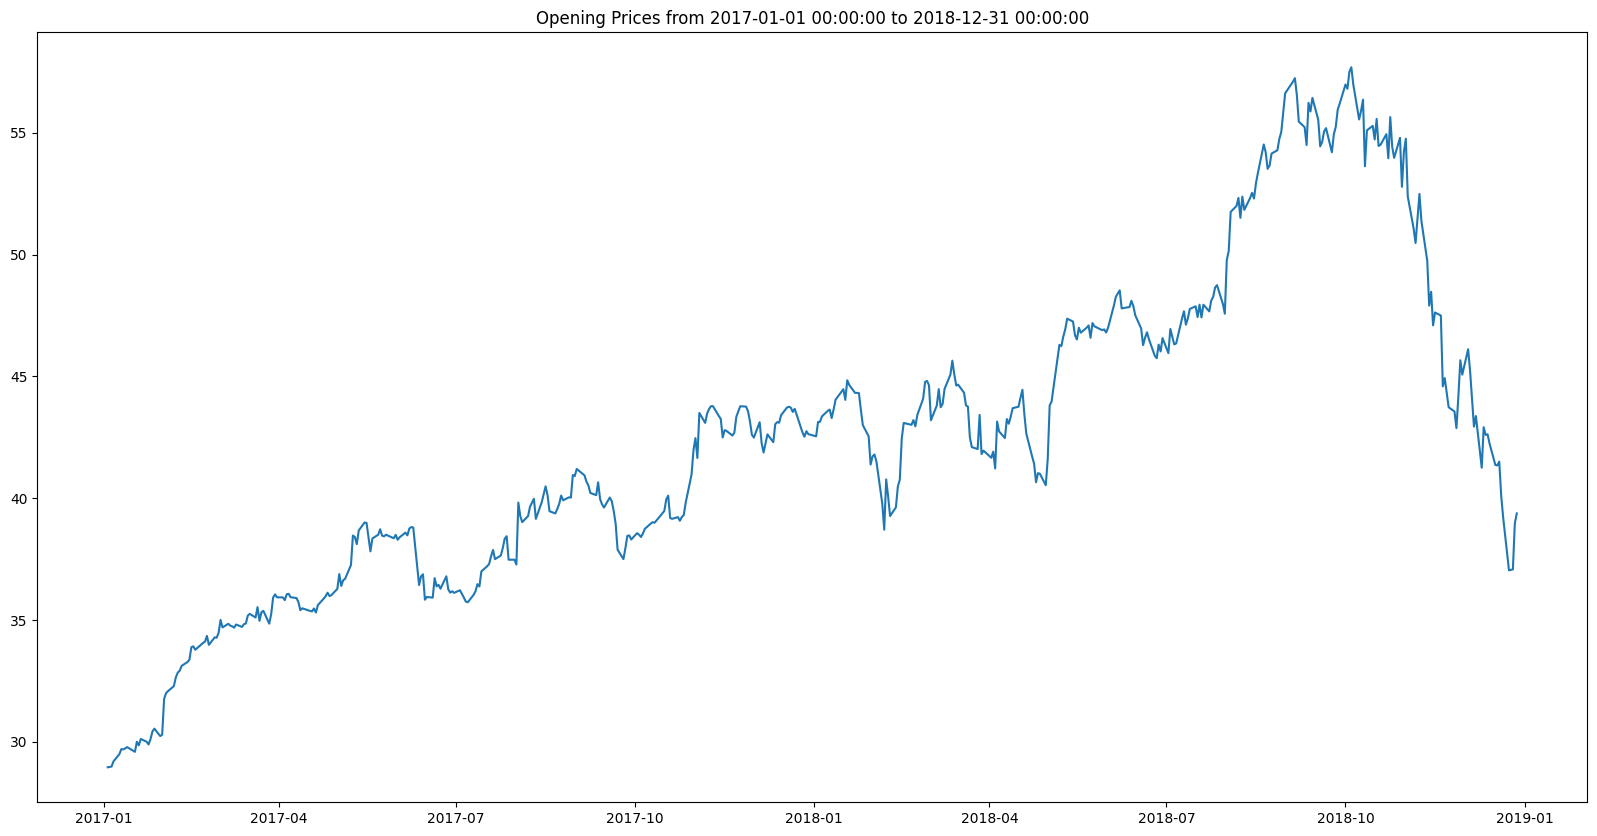

In [3]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
  

start_date = datetime(2017, 1, 1)
end_date = datetime(2018, 12, 31)
  

data = yf.download('AAPL', start = start_date,
                   end = end_date)
  
plt.figure(figsize = (20,10))
plt.title('Opening Prices from {} to {}'.format(start_date,
                                                end_date))
plt.plot(data['Open'])
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

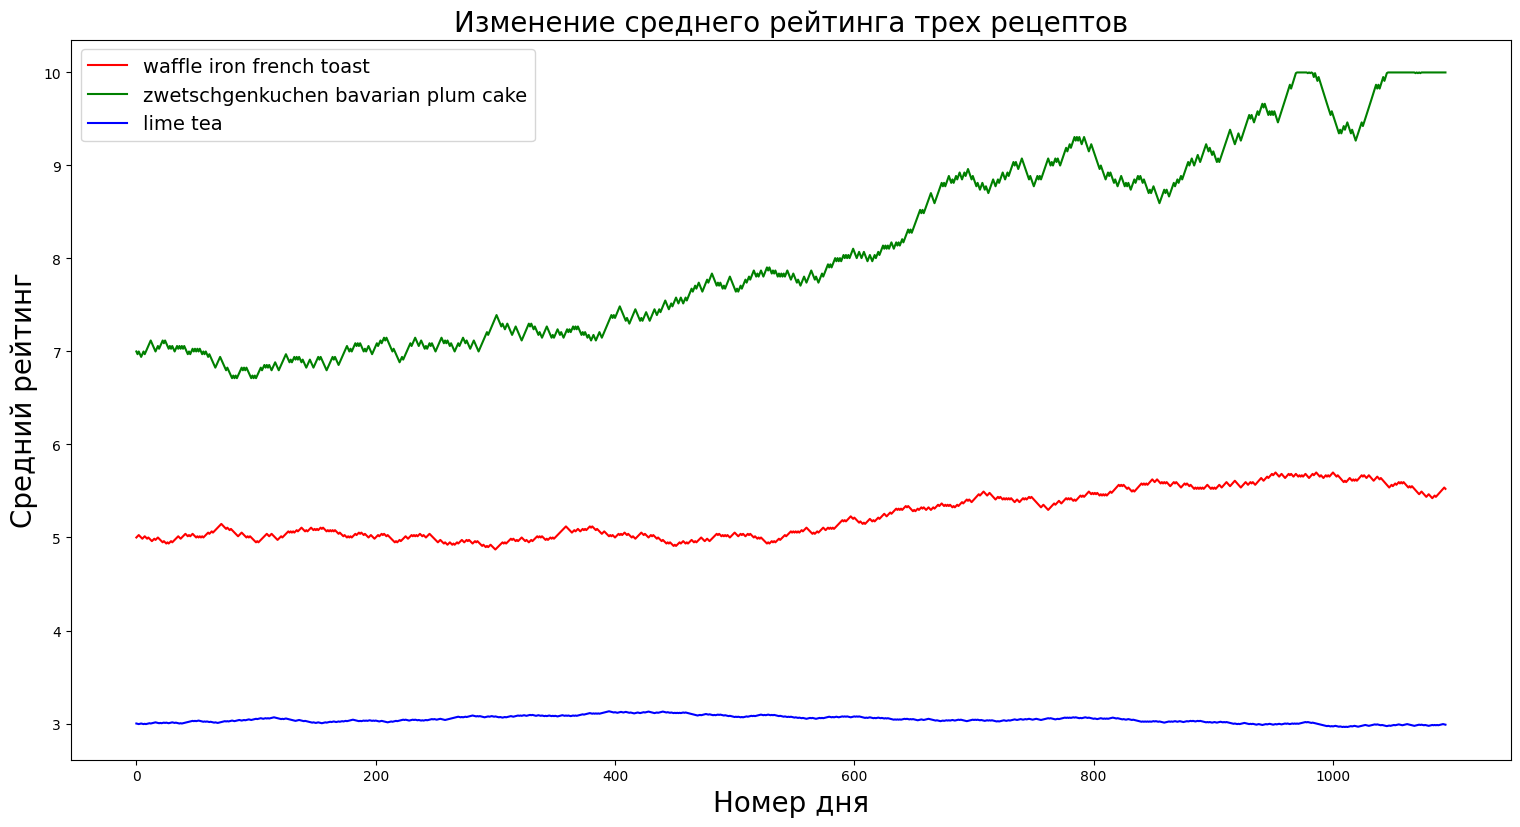

In [6]:
data = np.load('average_ratings.npy')

legend = {
    0: "waffle iron french toast",
    1: "zwetschgenkuchen bavarian plum cake",
    2: "lime tea"
}

fig = plt.figure(figsize = (24, 12))
ax = fig.add_axes([0.2, 0.2, 0.6, 0.6])
plt.plot(data[0], color='r', label=legend[0])
plt.plot(data[1], color='g', label=legend[1])
plt.plot(data[2], color='b', label=legend[2])
plt.xlabel("Номер дня", fontsize=20)
plt.ylabel("Средний рейтинг", fontsize=20)
plt.title('Изменение среднего рейтинга трех рецептов', fontsize=20) 

plt.legend(loc=0,fontsize=14)

plt.show()


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


<ipython-input-9-e4efa783b72a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.date_range(start='1/1/2019', end='30/12/2021')


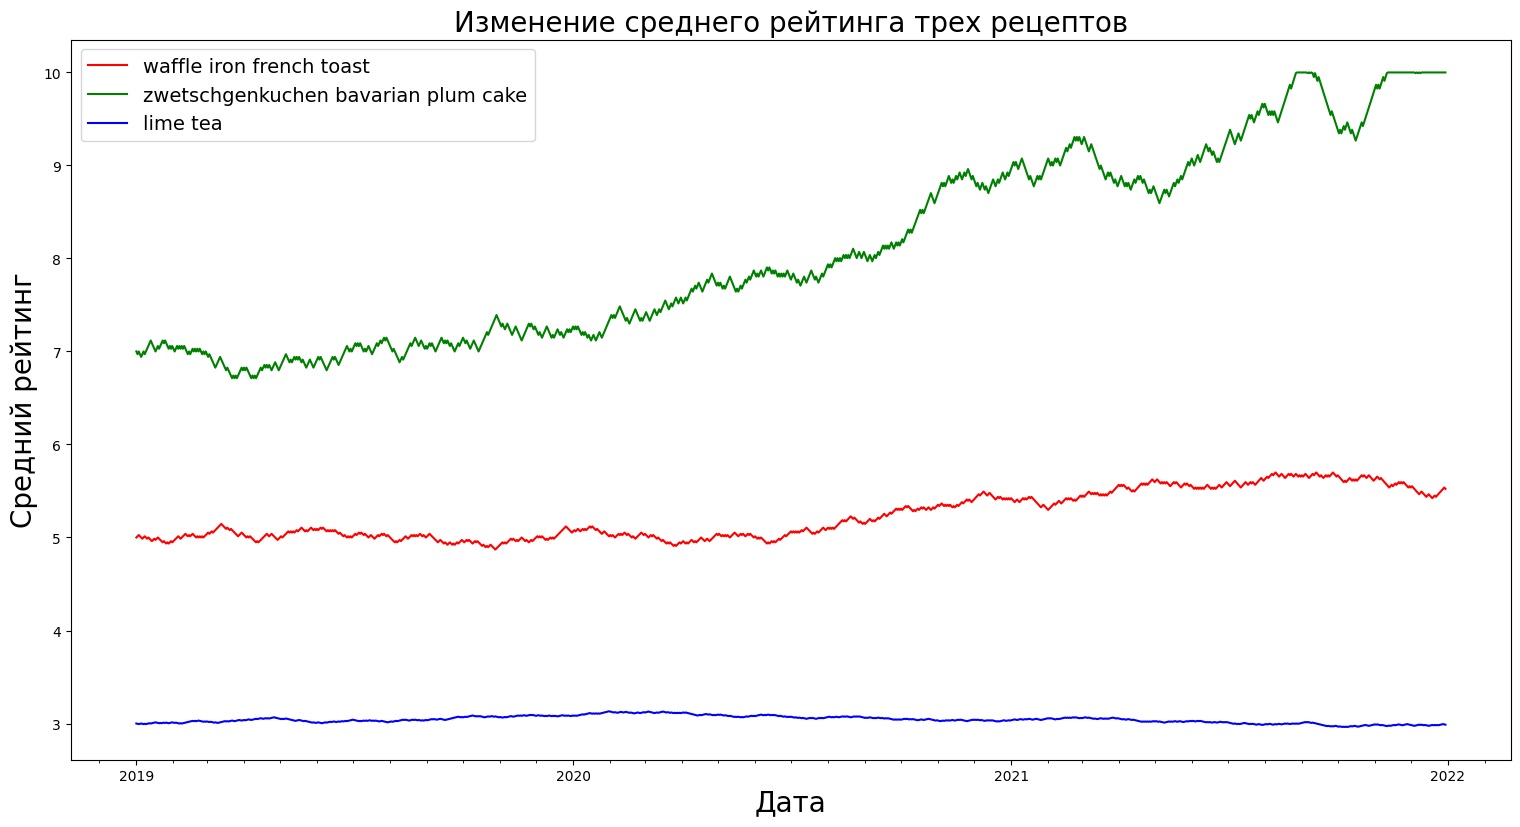

In [9]:
dates = pd.date_range(start='1/1/2019', end='30/12/2021')

fig = plt.figure(figsize = (24, 12))
ax = fig.add_axes([0.2, 0.2, 0.6, 0.6])

line1, = ax.plot(dates, data[0], 'red', label = legend[0])
line2, = ax.plot(dates, data[1], 'green', label = legend[1])
line3, = ax.plot(dates, data[2], 'blue', label = legend[2])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.set_ylabel('Средний рейтинг', fontsize=20)
ax.set_xlabel('Дата', fontsize=20)
ax.set_title("Изменение среднего рейтинга трех рецептов", fontsize=20)

plt.legend(loc=0,fontsize=14)

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

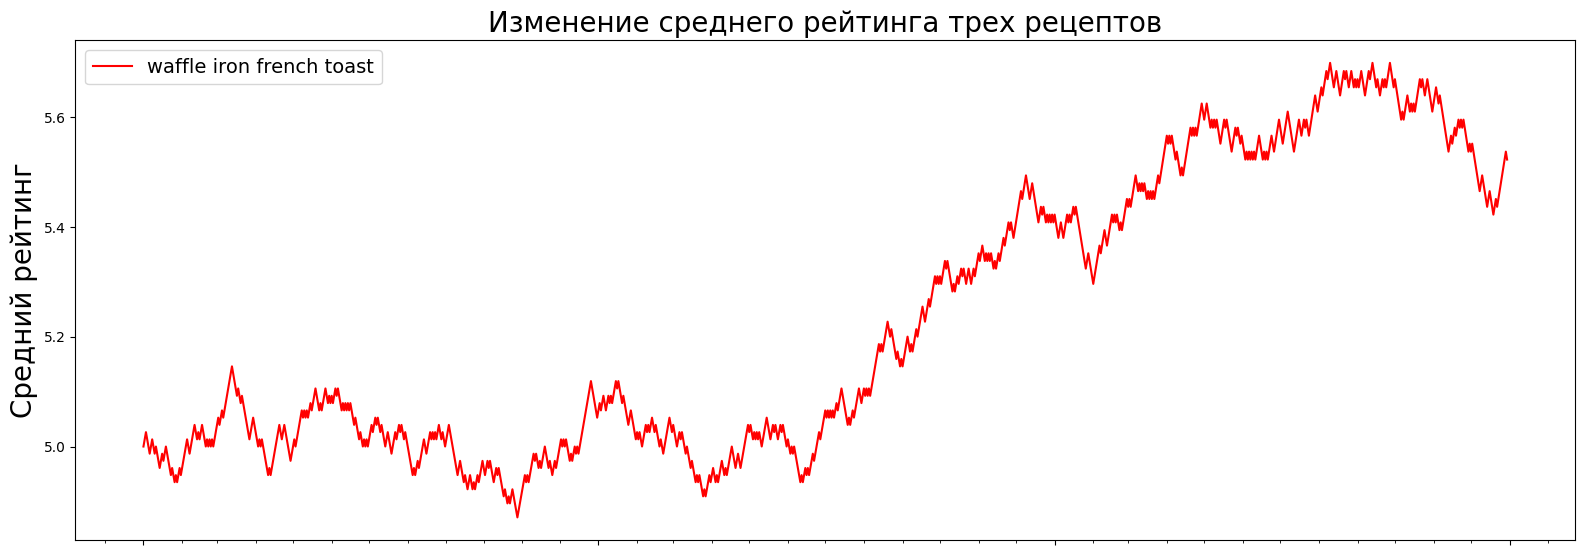

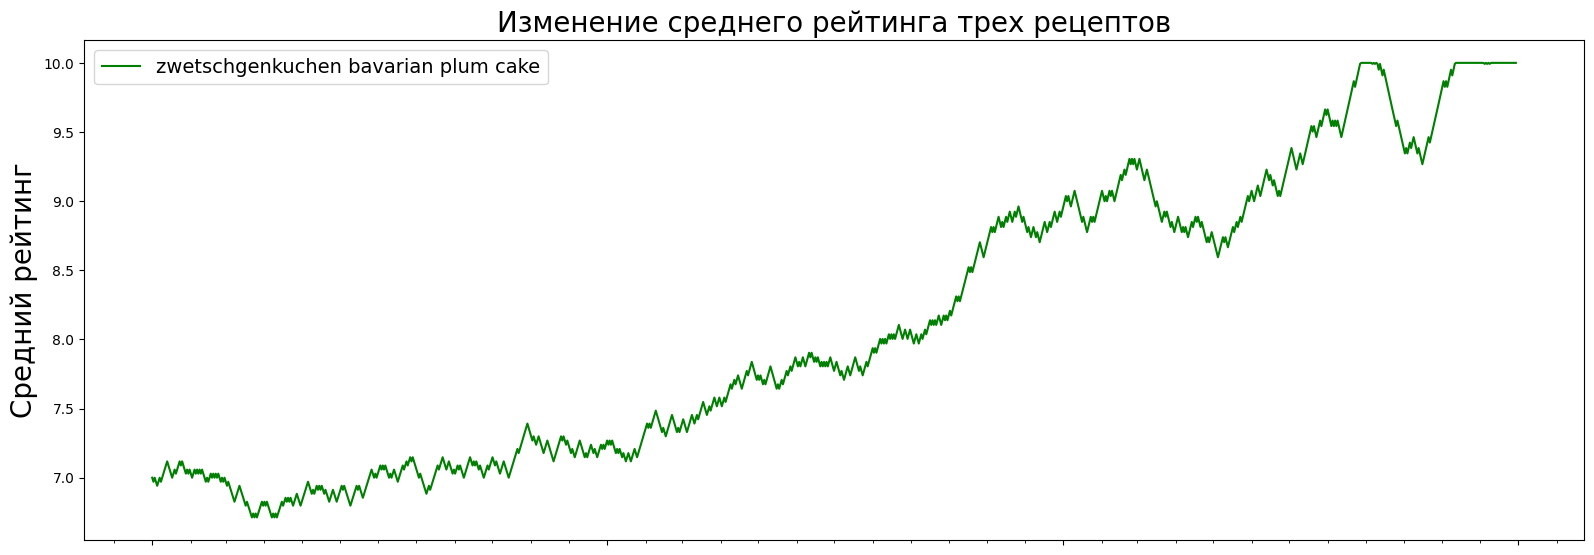

<ipython-input-12-1d1aad0e2a23>:38: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dates = pd.date_range(start='1/1/2019', end='30/12/2021')


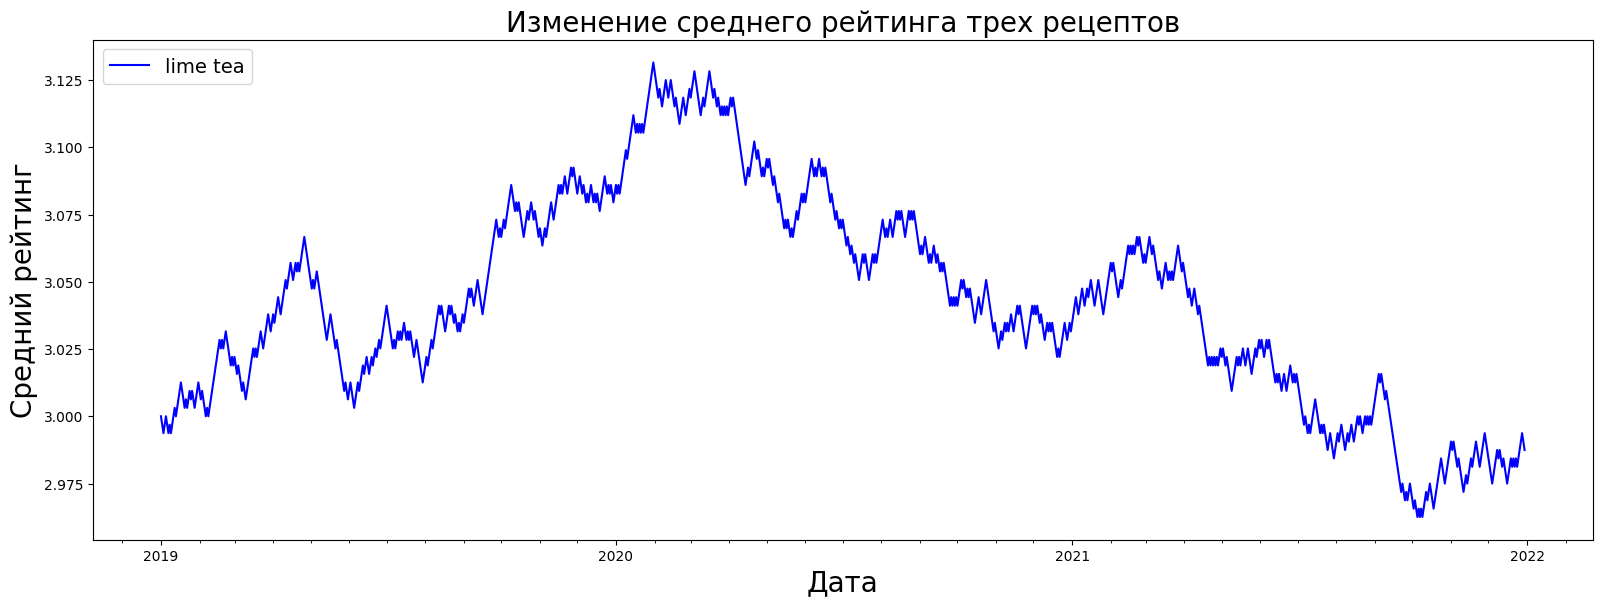

In [12]:
#1

fig = plt.figure(figsize = (30, 10))
ax = fig.add_axes([0.1, 0.1, 0.5, 0.5])

line1, = ax.plot(dates, data[0], 'r', label = legend[0])

ax.set_ylabel('Средний рейтинг', fontsize=20)
ax.set_title("Изменение среднего рейтинга трех рецептов", fontsize=20)

plt.legend(loc=2,fontsize=14)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.tick_params(labelbottom=False)

plt.show()

#2

fig = plt.figure(figsize = (30, 10))
ax = fig.add_axes([0.1, 0.1, 0.5, 0.5])

line2, = ax.plot(dates, data[1], 'g', label = legend[1])

ax.set_ylabel('Средний рейтинг', fontsize=20)
ax.set_title("Изменение среднего рейтинга трех рецептов", fontsize=20)

plt.legend(loc=2,fontsize=14)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.tick_params(labelbottom=False)

plt.show()

#3
dates = pd.date_range(start='1/1/2019', end='30/12/2021')

fig = plt.figure(figsize = (30, 10))
ax = fig.add_axes([0.1, 0.1, 0.5, 0.5])

line3, = ax.plot(dates, data[2], 'b', label = legend[2])

ax.set_ylabel('Средний рейтинг', fontsize=20)
ax.set_xlabel('Дата', fontsize=20)
ax.set_title("Изменение среднего рейтинга трех рецептов", fontsize=20)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())


plt.legend(loc=2,fontsize=14)


plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


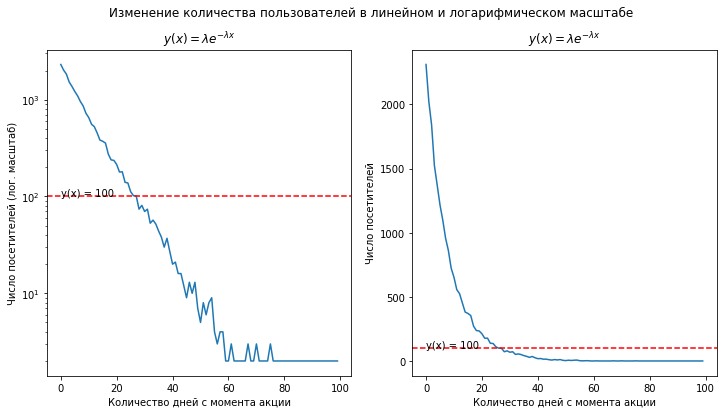

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

visitors = np.load('visitors.npy')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
x = np.arange(len(visitors))
y = visitors
plt.plot(x, y, '-')
plt.title("$y(x)=\lambda e^{-\lambda x}$")
plt.xlabel("Количество дней с момента акции")
plt.ylabel("Число посетителей")
plt.axhline(y=100, color='r', linestyle='--')
plt.text(0, 100, "y(x) = 100")

plt.subplot(121)
x = np.arange(len(visitors))
y = visitors
plt.semilogy(x, y, '-')
plt.title("$y(x)=\lambda e^{-\lambda x}$")
plt.xlabel("Количество дней с момента акции")
plt.ylabel("Число посетителей (лог. масштаб)")
plt.axhline(y=100, color='r', linestyle='--')
plt.text(0, 100, "y(x) = 100")

plt.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе")
plt.show()


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
reviews = ...
recipes = ...

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

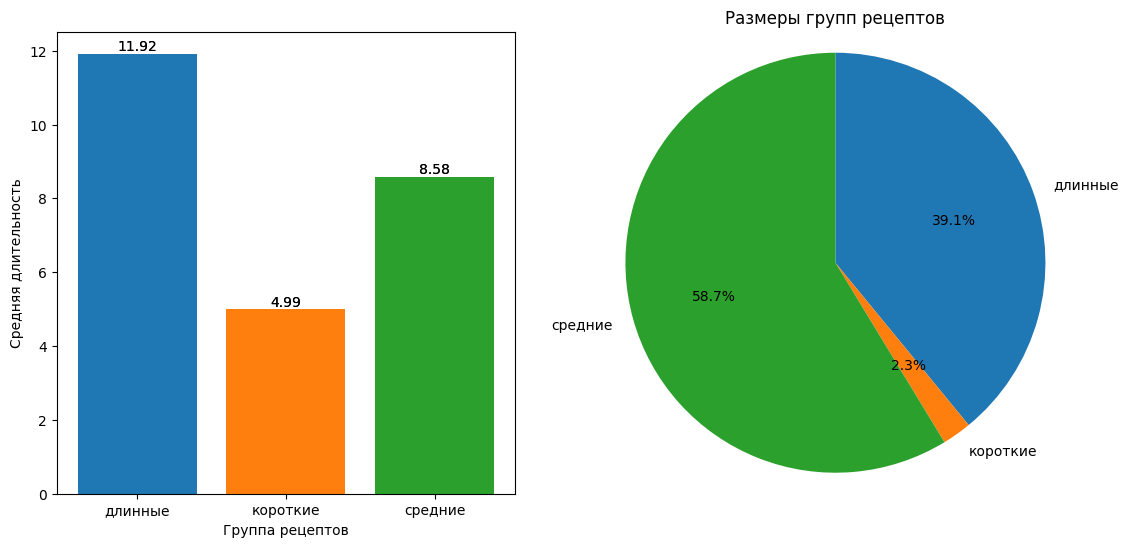

In [13]:
recipes = pd.read_csv("recipes_sample.csv")

conditions = [
    recipes['minutes'] < 5,
    (recipes['minutes'] >= 5) & (recipes['minutes'] < 50),
    recipes['minutes'] >= 50
]
values = ['Короткие', 'Средние', 'Длинные']
recipes['recipe_length'] = pd.Series(np.select(conditions, values))

grouped = recipes.groupby('recipe_length').agg({'n_steps': 'mean', 'name': 'count'}).reset_index()
grouped = grouped.rename(columns={'n_steps': 'mean_steps', 'name': 'recipe_count'})

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 6))
bars = ax1.bar(grouped['recipe_length'], grouped['mean_steps'], color=colors)
ax1.bar(grouped['recipe_length'], grouped['mean_steps'], color=colors)
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')

for i in ax1.patches:
    ax1.annotate(str(round(i.get_height(), 2)), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')

sizes = grouped['recipe_count']
ax2.pie(sizes, labels=grouped['recipe_length'], colors =  colors, autopct='%1.1f%%', startangle=90, counterclock=False)
ax2.axis('equal')
ax2.set_title('Размеры групп рецептов')

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

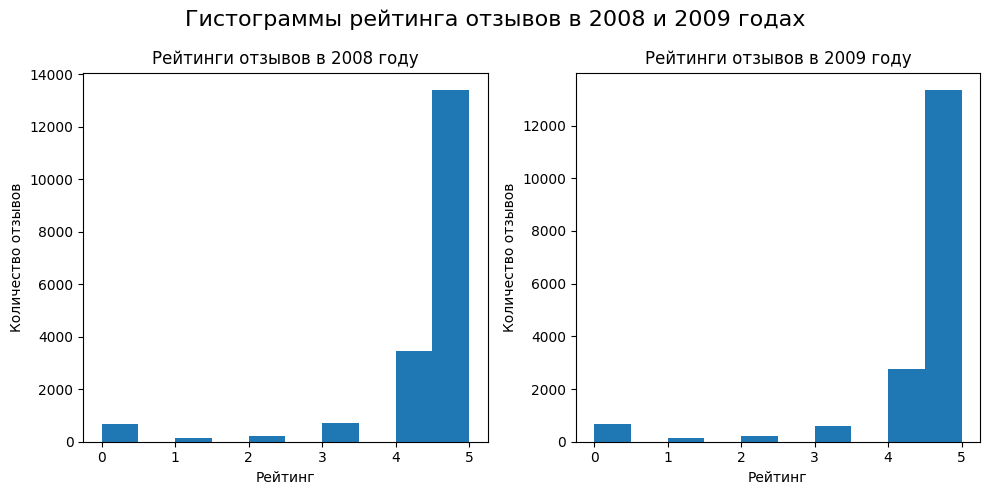

In [15]:
df = pd.read_csv('reviews_sample.csv')

# преобразование столбца date к типу datetime
df['date'] = pd.to_datetime(df['date'])

# создание фильтров для отбора отзывов за 2008 и 2009 годы
mask_2008 = (df['date'].dt.year == 2008)
mask_2009 = (df['date'].dt.year == 2009)

# отбор отзывов за 2008 и 2009 годы
df_2008 = df.loc[mask_2008]
df_2009 = df.loc[mask_2009]

# построение гистограмм рейтингов для 2008 и 2009 годов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

df_2008['rating'].plot.hist(ax=ax1)
ax1.set_title('Рейтинги отзывов в 2008 году')
ax1.set_xlabel('Рейтинг')
ax1.set_ylabel('Количество отзывов')

df_2009['rating'].plot.hist(ax=ax2)
ax2.set_title('Рейтинги отзывов в 2009 году')
ax2.set_xlabel('Рейтинг')
ax2.set_ylabel('Количество отзывов')

plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=16)
plt.tight_layout()
plt.show()


### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

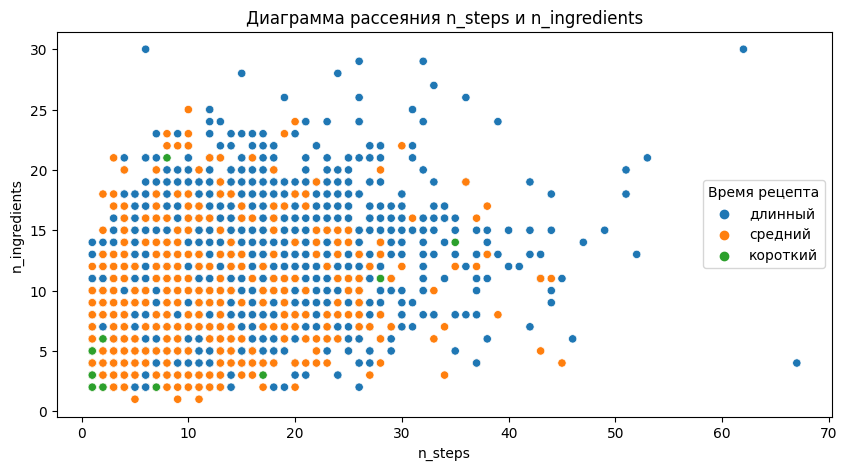

In [19]:
import seaborn as sns
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

recipes.loc[recipes['minutes'] < 5, 'Время рецепта'] = 'короткий'
recipes.loc[(recipes['minutes']>=5) & (recipes['minutes']<50), 'Время рецепта'] = 'средний'
recipes.loc[recipes['minutes']>=50, 'Время рецепта'] = 'длинный'
steps_mean = recipes.groupby('Время рецепта').mean('n_steps')['n_steps']
group_number = recipes.groupby('Время рецепта').count()['id']

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.scatterplot(x =recipes['n_steps'], y = recipes['n_ingredients'], hue = recipes['Время рецепта'], ax=ax)
ax.set_title('Диаграмма рассеяния n_steps и n_ingredients')

***Визуально не наблюдается явной линейной зависимости между количеством шагов (n_steps) и количеством ингредиентов (n_ingredients) в рецепте. В целом, можно сказать, что большинство коротких рецептов имеют небольшое количество шагов и ингредиентов, в то время как большинство длинных рецептов имеют более высокое значение обеих переменных. Средние рецепты, как можно ожидать, находятся между короткими и длинными***

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

<Axes: >

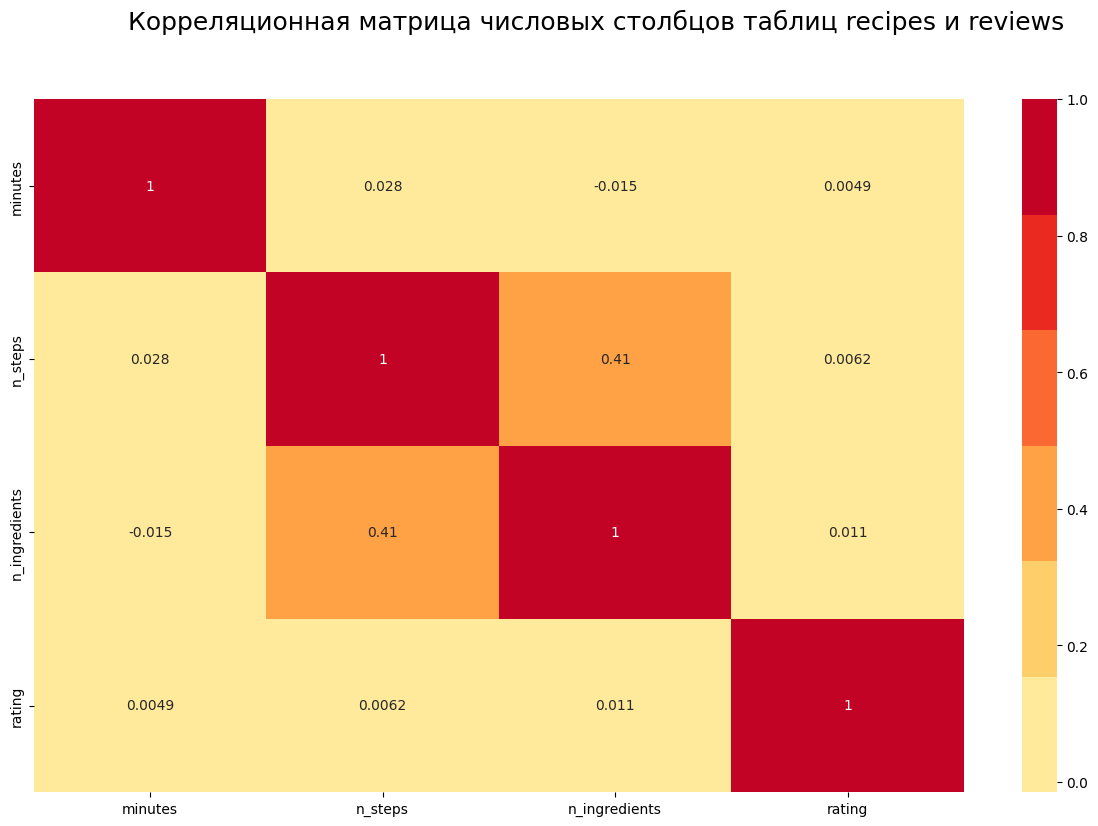

In [20]:
all_join = recipes.join(reviews)
correlation_matrix = all_join[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()

plt.figure(figsize=(15, 9))
plt.suptitle("Корреляционная матрица числовых столбцов таблиц recipes и reviews", fontsize=18)

ax0 = plt.axes()
sns.heatmap(correlation_matrix, ax=ax0, cmap=sns.color_palette('YlOrRd'), annot=True)